Stack Overflow, a popular website for developers, conducted an online survey of software professionals across the world. The survey data was later open sourced by Stack Overflow. The actual data set has around 90,000 responses.

The dataset you are going to use in this assignment comes from the following source: https://stackoverflow.blog/2019/04/09/the-2019-stack-overflow-developer-survey-results-are-in/ under a ODbL: Open Database License.

You will be given a subset of the original data set in this capstone project. You will explore, analyze, and visualize this dataset and present your analysis.

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|

### Import Libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
import scipy.stats

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)

from pycaret.regression import *

Autosaving every 60 seconds


In [2]:
df = pd.read_csv("githubsurvey.csv")

In [3]:
df

,Employment,Country,Student,EdLevel,DevType,YearsCode,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,Age,Gender,Ethnicity,NormalizedAnnualCompensation
0,full-time,United States,No,Bachelors degree,full-stack,3,61000.0,Yearly,61000.0,80.0,22.0,Man,White,61000.0
1,full-time,New Zealand,No,No degree,Database administrator,12,138000.0,Yearly,95179.0,32.0,23.0,Man,White,138000.0
2,full-time,United States,No,Masters degree,Data or business analyst,17,90000.0,Yearly,90000.0,40.0,28.0,Man,White,90000.0
3,full-time,United Kingdom,No,Masters degree,full-stack,10,29000.0,Monthly,455352.0,40.0,26.0,Man,White,348000.0
4,full-time,Australia,No,Bachelors degree,Developer,5,90000.0,Yearly,65277.0,45.0,29.0,Man,Hispanic,90000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11393,full-time,United States,No,Masters degree,Data or business analyst,20,130000.0,Yearly,130000.0,40.0,36.0,Man,White,130000.0
11394,full-time,Poland,No,Masters degree,Developer,8,74400.0,Yearly,19880.0,40.0,25.0,Man,White,74400.0
11395,full-time,United States,No,Masters degree,Designer,17,105000.0,Yearly,105000.0,40.0,34.0,Man,White,105000.0
11396,full-time,Switzerland,No,Secondary school,Database administrator,10,80000.0,Yearly,80371.0,42.5,25.0,Man,White,80000.0


## Exploratory Data Analysis

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.columns

## Data Visualization

### Univariate Data Exploration

In [ ]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

In [ ]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

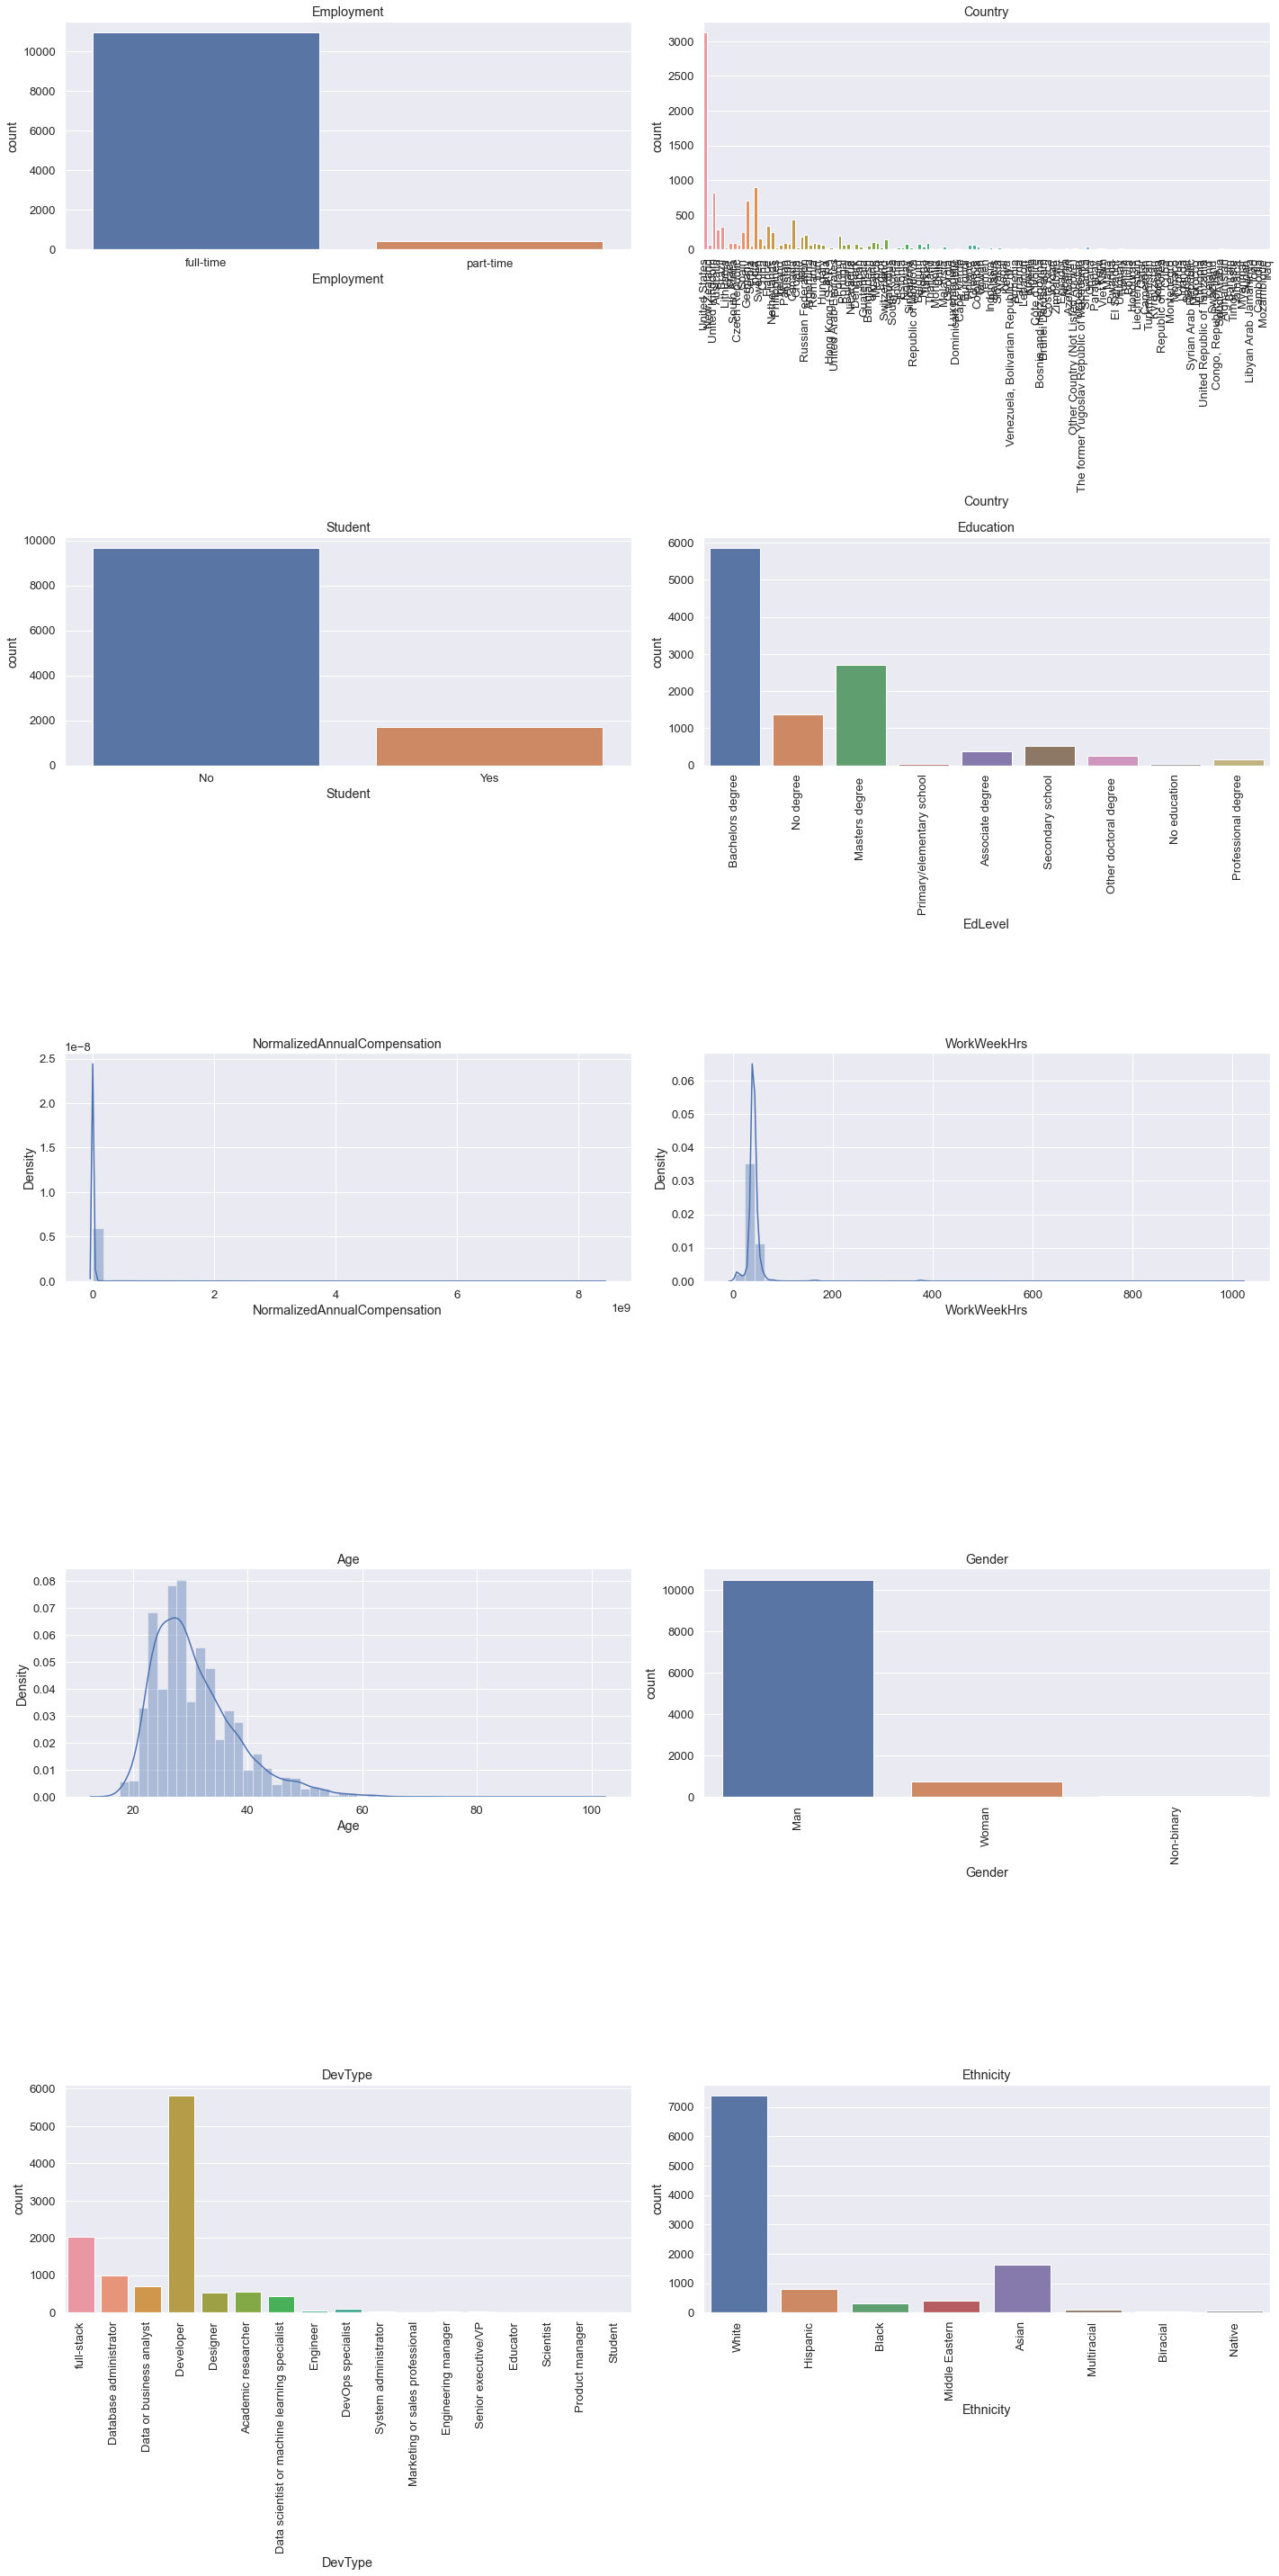

In [4]:
fig = plt.figure(figsize=(20,40))

plt.subplot(5,2,1)
plt.title("Employment")
sns.countplot(df.Employment)

plt.subplot(5,2,2)
plt.title("Country")
plt.xticks(rotation=90)
sns.countplot(df.Country)

plt.subplot(5,2,3)
plt.title("Student")
sns.countplot(df.Student)

plt.subplot(5,2,4)
plt.title("Education")
plt.xticks(rotation=90)
sns.countplot(df.EdLevel)

plt.subplot(5,2,5)
plt.title("NormalizedAnnualCompensation")
sns.distplot(a=df.NormalizedAnnualCompensation)

plt.subplot(5,2,6)
plt.title("WorkWeekHrs")
sns.distplot(a=df.WorkWeekHrs)

plt.subplot(5,2,7)
plt.title("Age")
sns.distplot(a=df.Age)

plt.subplot(5,2,8)
plt.title("Gender")
plt.xticks(rotation=90)
sns.countplot(df.Gender)

plt.subplot(5,2,9)
plt.title("DevType")
plt.xticks(rotation=90)
sns.countplot(df.DevType)

plt.subplot(5,2,10)
plt.title("Ethnicity")
plt.xticks(rotation=90)
sns.countplot(df.Ethnicity)

plt.tight_layout()
plt.show()

### Correlation

In [6]:
df.corr()

,CompTotal,ConvertedComp,WorkWeekHrs,Age,NormalizedAnnualCompensation
CompTotal,1.000000,0.001037,0.003510,0.006968,0.863240
ConvertedComp,0.001037,1.000000,0.021143,0.105418,0.012991
WorkWeekHrs,0.003510,0.021143,1.000000,0.036521,0.005526
Age,0.006968,0.105418,0.036521,1.000000,-0.005224
NormalizedAnnualCompensation,0.863240,0.012991,0.005526,-0.005224,1.000000


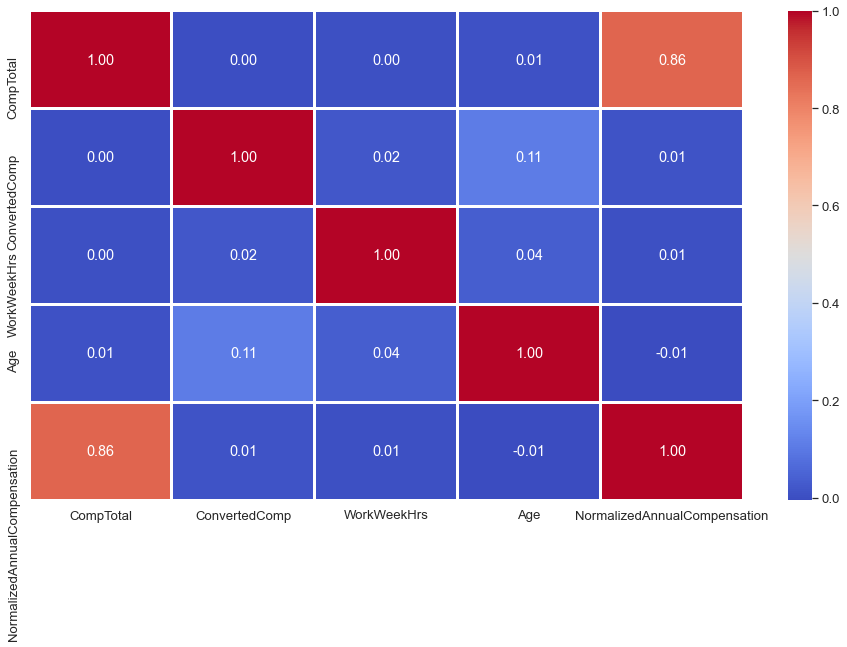

In [7]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

## Hypothesis Testing

The goal of hypothesis testing is to answer the question, “Given a sample and an apparent effect, what is the probability of seeing such an effect by chance?” The first step is to quantify the size of the apparent effect by choosing a test statistic (t-test, ANOVA, etc). The next step is to define a null hypothesis, which is a model of the system based on the assumption that the apparent effect is not real. Then compute the p-value, which is the probability of the null hypothesis being true, and finally interpret the result of the p-value, if the value is low, the effect is said to be statistically significant, which means that the null hypothesis may not be accurate.

### T-Test

We will be using the t-test for independent samples. For the independent t-test, the following assumptions must be met.

-   One independent, categorical variable with two levels or group
-   One dependent continuous variable
-   Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
-   The dependent variable must follow a normal distribution
-   Assumption of homogeneity of variance


State the hypothesis

-   $H_0: µ\_1 = µ\_2$ ("there is no difference in evaluation scores between male and females")
-   $H_1: µ\_1 ≠ µ\_2$ ("there is a difference in evaluation scores between male and females")


### Levene's Test

In [ ]:
scipy.stats.levene(ratings_df[ratings_df['gender'] == 'female']['eval'],
                   ratings_df[ratings_df['gender'] == 'male']['eval'], center='mean')

### T-Test

In [ ]:
scipy.stats.ttest_ind(ratings_df[ratings_df['gender'] == 'female']['eval'],
                   ratings_df[ratings_df['gender'] == 'male']['eval'], equal_var = True)

### ANOVA

First, we group the data into cateries as the one-way ANOVA can't work with continuous variable - using the example from the video, we will create a new column for this newly assigned group our categories will be teachers that are:

-   40 years and younger
-   between 40 and 57 years
-   57 years and older


State the hypothesis

-   $H_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
-   $H_1:$ At least one of the means differ


In [ ]:
f_statistic, p_value = scipy.stats.f_oneway(forty_lower, forty_fiftyseven, fiftyseven_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

### Chi-square

State the hypothesis:

-   $H_0:$ The proportion of teachers who are tenured is independent of gender
-   $H_1:$ The proportion of teachers who are tenured is associated with gender

In [ ]:
#Create a Cross-tab table

cont_table  = pd.crosstab(ratings_df['tenure'], ratings_df['gender'])
cont_table

In [ ]:
scipy.stats.chi2_contingency(cont_table, correction = True)

### Correlation

State the hypothesis:

-   $H_0:$ Teaching evaluation score is not correlated with beauty score
-   $H_1:$ Teaching evaluation score is correlated with beauty score


In [ ]:
scipy.stats.pearsonr(ratings_df['beauty'], ratings_df['eval'])

## Data Preprocessing

### Drop unwanted features

In [8]:
df.columns

Index(['Employment', 'Country', 'Student', 'EdLevel', 'DevType', 'YearsCode', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'Age', 'Gender', 'Ethnicity', 'NormalizedAnnualCompensation'], dtype='object')

In [9]:
df.drop(['Country','CompTotal', 'CompFreq', 'ConvertedComp'],axis=1,inplace=True)

In [10]:
df.head()

,Employment,Student,EdLevel,DevType,YearsCode,WorkWeekHrs,Age,Gender,Ethnicity,NormalizedAnnualCompensation
0,full-time,No,Bachelors degree,full-stack,3,80.0,22.0,Man,White,61000.0
1,full-time,No,No degree,Database administrator,12,32.0,23.0,Man,White,138000.0
2,full-time,No,Masters degree,Data or business analyst,17,40.0,28.0,Man,White,90000.0
3,full-time,No,Masters degree,full-stack,10,40.0,26.0,Man,White,348000.0
4,full-time,No,Bachelors degree,Developer,5,45.0,29.0,Man,Hispanic,90000.0


In [11]:
df.shape

(11398, 10)

### Treat Missing Values

In [12]:
df.isnull().sum()

Employment                        0
Student                          51
EdLevel                         112
DevType                          65
YearsCode                         9
WorkWeekHrs                     122
Age                             287
Gender                           73
Ethnicity                       675
NormalizedAnnualCompensation    815
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

Employment                      0
Student                         0
EdLevel                         0
DevType                         0
YearsCode                       0
WorkWeekHrs                     0
Age                             0
Gender                          0
Ethnicity                       0
NormalizedAnnualCompensation    0
dtype: int64

### Treat Duplicate Values

In [15]:
df.duplicated(keep='first').sum()

17

In [16]:
df[df.duplicated(keep=False)] #Check duplicate values

,Employment,Student,EdLevel,DevType,YearsCode,WorkWeekHrs,Age,Gender,Ethnicity,NormalizedAnnualCompensation
265,full-time,No,No degree,Developer,11,40.0,25.0,Man,White,60000.0
343,full-time,No,Bachelors degree,Developer,14,40.0,32.0,Man,White,90000.0
807,full-time,No,No degree,Developer,16,40.0,32.0,Man,White,48000.0
911,full-time,No,Bachelors degree,full-stack,9,40.0,26.0,Man,White,60000.0
1069,full-time,No,Bachelors degree,Developer,5,40.0,28.0,Man,White,58000.0
1221,full-time,No,Associate degree,Developer,10,40.0,27.0,Man,White,45000.0
2115,full-time,No,Bachelors degree,full-stack,6,40.0,32.0,Man,White,70000.0
2277,full-time,No,No degree,Developer,15,40.0,28.0,Man,White,30000.0
3134,full-time,No,Associate degree,Developer,10,40.0,27.0,Man,White,45000.0
3228,full-time,No,Bachelors degree,Data or business analyst,11,40.0,28.0,Man,White,90000.0


In [17]:
df.drop_duplicates(ignore_index=True, inplace=True)

In [18]:
df.shape

(9504, 10)

### PyCaret

In [21]:
exp = setup(data=df, target='NormalizedAnnualCompensation', session_id=0, normalize=True)

,Description,Value
0,session_id,0
1,Target,NormalizedAnnualCompensation
2,Original Data,"(9504, 10)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(6652, 90)"


In [22]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
en,Elastic Net,12260117.8000,13764996897334886.0000,81443200.4000,0.0302,4.0990,2597.2518,0.2090
omp,Orthogonal Matching Pursuit,14550222.3254,13350673029481576.0000,80390498.3177,0.0197,3.7975,5335.5822,0.0280
ridge,Ridge Regression,15320738.7000,13353108755185664.0000,80491773.2000,0.0145,3.9209,5391.6982,0.0250
lasso,Lasso Regression,15373924.3000,13354652433540710.0000,80520346.0000,0.0130,3.9277,5423.5551,0.2090
llar,Lasso Least Angle Regression,15372563.5903,13354636295885500.0000,80520192.1314,0.0130,3.9277,5423.5664,0.6160
br,Bayesian Ridge,12514739.7324,13895799900713316.0000,82349842.2175,-0.0034,4.2390,1792.3273,0.0440
huber,Huber Regressor,6778638.9845,13935246022260744.0000,82544979.0093,-0.0089,1.7254,81.0419,0.5460
par,Passive Aggressive Regressor,6777858.3672,13935598523907878.0000,82547562.6400,-0.0090,1.7482,69.2260,1.2310
lightgbm,Light Gradient Boosting Machine,12177833.3126,13571890594536980.0000,86409302.5983,-0.7296,2.8828,14357.5479,0.0810
knn,K Neighbors Regressor,10258236.5000,15537443839986892.0000,96081878.4000,-1.0290,2.3455,4728.9056,0.2910


In [23]:
print(best_model)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=0, selection='cyclic', tol=0.0001, warm_start=False)


## Regression Analysis

In [ ]:
df.columns

In [ ]:
y = df['NormalizedAnnualCompensation']
X = df['Age']

In [ ]:
X = sm.add_constant(X)

In [ ]:
model = sm.OLS(y,X).fit()

In [ ]:
model.summary()

In [ ]:
prediction = model.predict(X)

In [ ]:
prediction